<a href="https://colab.research.google.com/github/MSaintjohn/Python-201/blob/main/201_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('NYPD_Arrest_Data__Year_to_Date_.csv')

Which borough has the highest amount of assaults?

In [3]:
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,234233843,09/29/2021,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,B,42,0,25-44,M,BLACK,1009231,240290,40.826189,-73.909738,POINT (-73.90973778899996 40.82618898100003)
1,234129823,09/27/2021,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0,25-44,M,BLACK,1003606,185050,40.674583,-73.930222,POINT (-73.93022154099998 40.67458330800008)
2,234040747,09/25/2021,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,Q,101,0,25-44,M,BLACK,1049232,159210,40.603441,-73.765986,POINT (-73.76598558899997 40.60344094100003)
3,234047720,09/25/2021,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,44,0,25-44,M,BLACK,1006537,244511,40.837782,-73.919458,POINT (-73.91945797099999 40.83778161800007)
4,234042526,09/25/2021,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,44,0,25-44,M,BLACK,1007418,243859,40.835990,-73.916276,POINT (-73.91627635999998 40.83598980000005)


In [4]:
df.tail()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
115294,222689440,01/06/2021,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,Q,102,0,18-24,M,ASIAN / PACIFIC ISLANDER,1031076,193779,40.698440,-73.831130,POINT (-73.83112953899997 40.69843969400005)
115295,222626401,01/05/2021,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,B,49,0,25-44,M,BLACK HISPANIC,1027430,251105,40.855803,-73.843910,POINT (-73.84390995399998 40.85580274300003)
115296,222477062,01/01/2021,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL0511001,M,B,50,0,25-44,M,WHITE HISPANIC,1011047,256269,40.870041,-73.903112,POINT (-73.90311219699998 40.870041281000056)
115297,222728174,01/07/2021,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,Q,114,0,25-44,M,WHITE HISPANIC,1007694,219657,40.769561,-73.915363,POINT (-73.91536344699995 40.76956124200007)
115298,222535613,01/03/2021,792.0,WEAPONS POSSESSION 1 & 2,118.0,DANGEROUS WEAPONS,PL 265031B,F,K,67,0,25-44,M,BLACK,1000054,173952,40.644129,-73.943053,POINT (-73.94305278599995 40.64412879400004)


In [5]:
df.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'],
      dtype='object')

In [6]:
df['ARREST_KEY'].is_unique

True

Change index to arrest key and sort it in descending order

In [7]:
df= df.set_index('ARREST_KEY')

In [8]:
df.sort_index()

,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
ARREST_KEY,,,,,,,,,,,,,,,,,,
222471128,01/01/2021,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,K,72,0,25-44,M,BLACK,984058,178998,40.657993,-74.000693,POINT (-74.00069344599996 40.65799306600008)
222471321,01/01/2021,258.0,"CRIMINAL MISCHIEF 4TH, GRAFFIT",351.0,CRIMINAL MISCHIEF & RELATED OF,PL 1456002,M,K,90,0,25-44,F,WHITE,1004604,197474,40.708682,-73.926586,POINT (-73.92658613799993 40.70868207700005)
222471328,01/01/2021,259.0,"CRIMINAL MISCHIEF,UNCLASSIFIED 4",351.0,CRIMINAL MISCHIEF & RELATED OF,PL 1450001,M,Q,115,0,25-44,M,BLACK HISPANIC,1018714,214946,40.756595,-73.875603,POINT (-73.87560301799994 40.756594678000056)
222471331,01/01/2021,139.0,"MURDER,UNCLASSIFIED",101.0,MURDER & NON-NEGL. MANSLAUGHTE,PL 1252501,F,Q,103,0,<18,M,BLACK,1041879,197084,40.707447,-73.792142,POINT (-73.79214176799998 40.707447364000075)
222472984,01/01/2021,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,B,47,0,25-44,M,BLACK,1021660,260322,40.881127,-73.864716,POINT (-73.86471645199998 40.881126907000066)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234334853,09/30/2021,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,B,43,0,25-44,M,WHITE HISPANIC,1020183,239283,40.823387,-73.870170,POINT (-73.87017045 40.82338729100008)
234334854,09/30/2021,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,B,43,0,25-44,M,WHITE HISPANIC,1020183,239283,40.823387,-73.870170,POINT (-73.87017045 40.82338729100008)
234334855,09/30/2021,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,B,43,0,25-44,M,WHITE HISPANIC,1020183,239283,40.823387,-73.870170,POINT (-73.87017045 40.82338729100008)


Drop unnecessary columns

In [9]:
drop_cols= ['ARREST_DATE','PD_CD', 'PD_DESC', 'KY_CD', 'LAW_CODE', 'X_COORD_CD','Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column',
            'JURISDICTION_CODE','LAW_CAT_CD', 'ARREST_PRECINCT',	'AGE_GROUP',	'PERP_SEX',	'PERP_RACE']
df.drop(drop_cols, inplace = True, axis=1)
df.head()

,OFNS_DESC,ARREST_BORO
ARREST_KEY,,
234233843,FELONY ASSAULT,B
234129823,RAPE,K
234040747,FELONY ASSAULT,Q
234047720,ASSAULT 3 & RELATED OFFENSES,B
234042526,ASSAULT 3 & RELATED OFFENSES,B


Rename Borough names for clarity.

In [10]:
df['ARREST_BORO'].replace({"B": "Bronx", "K": "Brooklyn", "M": "Manhattan", "Q": "Queens", "S": "Staten Island"}, inplace=True)

In [11]:
df.head()

,OFNS_DESC,ARREST_BORO
ARREST_KEY,,
234233843,FELONY ASSAULT,Bronx
234129823,RAPE,Brooklyn
234040747,FELONY ASSAULT,Queens
234047720,ASSAULT 3 & RELATED OFFENSES,Bronx
234042526,ASSAULT 3 & RELATED OFFENSES,Bronx


Filter data in offense description to only felony assault

In [12]:
df1 = df[df['OFNS_DESC'] == 'FELONY ASSAULT']
df1.head()

,OFNS_DESC,ARREST_BORO
ARREST_KEY,,
234233843,FELONY ASSAULT,Bronx
234040747,FELONY ASSAULT,Queens
233878488,FELONY ASSAULT,Bronx
232136706,FELONY ASSAULT,Brooklyn
232064905,FELONY ASSAULT,Bronx


In [13]:
df1.groupby(['ARREST_BORO'])['OFNS_DESC'].count()

ARREST_BORO
Bronx            2852
Brooklyn         3352
Manhattan        2363
Queens           2522
Staten Island     383
Name: OFNS_DESC, dtype: int64

create a pie chart for visualization

In [18]:
x= np.array([2852, 3352, 2363, 2522, 383])
labels= ["Bronx", "Brooklyn", "Manhattan", "Queens", "Staten Island"]

Text(0.5, 1.0, 'Felonly Assault by Borough')

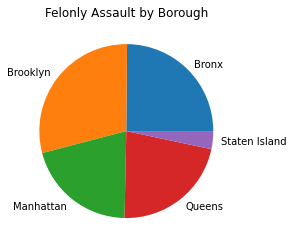

In [24]:
plt.pie(x, labels= labels)
plt.title("Felonly Assault by Borough")

Brooklyn has the highest amounts of felony assault.